In [4]:
import keras
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import scipy.io as sio
from imutils import paths
from keras.utils import to_categorical
import scipy.misc as mi
import matplotlib.pyplot as plt

In [5]:

# Import necessary packages
import argparse

# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

def alexnet_model(img_shape=(28, 28, 3), n_classes=2, l2_reg=0.,weights=None):

    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
        padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(512, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(3072))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    if weights is not None:
        alexnet.load_weights(weights)

    return alexnet

def parse_args():
    parser = argparse.ArgumentParser(description='AlexNet model')
    optional = parser._action_groups.pop()
    required = parser.add_argument_group('required arguments')
    optional.add_argument('--print_model',
        dest='print_model',
        help='Print AlexNet model',
        action='store_true')
    parser._action_groups.append(optional)
    return parser.parse_args()

In [6]:
def createModel():
    model = Sequential()
    
    #Convolutional layers with 32 filters / kernels with a window size of 3×3
        
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
     #Max pooling layer with window size 2×2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #Conv layer with 64 filters
        
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #Dense layer which performs the classification among 10 classes using a softmax layer
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
     
    return model

In [7]:
def preprocessInpuutImage(pathToImage, width , height):
    image = cv2.imread(pathToImage)### CHANGE PATH
    zimage = cv2.resize(image, (width, height))
    
    image = zimage.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    return image 

In [24]:
import random
import cv2

In [25]:
seed = 9
np.random.seed(seed)

In [32]:
imageFolderPath = '/home/neuronelab/Desktop/FraudDetection_v2/NN/SunglassesModel/Images'
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(imageFolderPath)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    if imagePath is not None:
        try:
            # load the image, pre-process it, and store it in the data list
            image = cv2.imread(imagePath)
            zimage = cv2.resize(image, (128, 128))
            image = img_to_array(zimage)
            data.append(image)
            # extract the class label from the image path and update the
            # labels list
            label = imagePath.split(os.path.sep)[-2]
            print(label)
            label = 1 if label == "sunglasses" else 0
            labels.append(label)
        except:
            print("Error loading",imagePath)
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

[INFO] loading images...
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
sung

not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
not_sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
not_sunglasses
sunglasses
sunglasses
sunglasses
not_sunglasses
su

In [33]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)
print(trainX.shape)

(736, 128, 128, 3)


In [38]:
model=createModel()

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
h  = model.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=20, batch_size=32, verbose=1)

Train on 736 samples, validate on 184 samples
Epoch 1/20
736/736 [==============================] - 25s 34ms/step - loss: 0.5639 - acc: 0.7459 - val_loss: 0.7560 - val_acc: 0.6848
Epoch 2/20
736/736 [==============================] - 24s 32ms/step - loss: 0.2917 - acc: 0.8777 - val_loss: 0.1036 - val_acc: 0.9565
Epoch 3/20
736/736 [==============================] - 24s 33ms/step - loss: 0.1105 - acc: 0.9620 - val_loss: 0.0746 - val_acc: 0.9837
Epoch 4/20
736/736 [==============================] - 24s 32ms/step - loss: 0.0711 - acc: 0.9742 - val_loss: 0.1632 - val_acc: 0.9402
Epoch 5/20
736/736 [==============================] - 24s 32ms/step - loss: 0.0670 - acc: 0.9742 - val_loss: 0.0699 - val_acc: 0.9783
Epoch 6/20
736/736 [==============================] - 25s 33ms/step - loss: 0.0730 - acc: 0.9755 - val_loss: 0.1482 - val_acc: 0.9565
Epoch 7/20
736/736 [==============================] - 24s 32ms/step - loss: 0.0650 - acc: 0.9837 - val_loss: 0.0565 - val_acc: 0.9891
Epoch 8/20
736/7

In [17]:
model.save('sunglassesModel128x128_3110.model')

In [18]:
hist=h

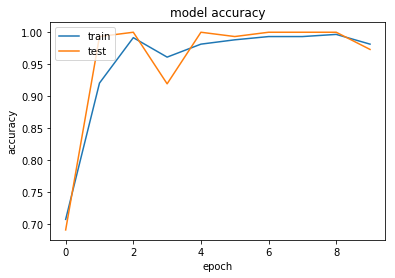

In [19]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

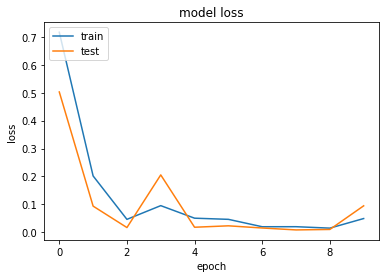

In [20]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# pre-process the image for classification
image = cv2.imread('/home/neuronelab/Desktop/FraudDetection_v2/NN/test_images/c1')### CHANGE PATH
zimage = cv2.resize(image, (128, 128))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES

error: OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [31]:
(notSunglasses, sunglasses) = model.predict(preprocessInpuutImage('/home/neuronelab/Desktop/FraudDetection_v2/NN/test_images/s6.jpg' , 128 , 128))[0]
# build the label
label = "Sunglasses" if sunglasses > notSunglasses else "Not Sunglasses"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

Not Sunglasses: 54.17%


In [38]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [39]:
activations = activation_model.predict(image)
first_layer_activation = activations[1]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (128, 128, 3)

In [37]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

IndexError: tuple index out of range

In [ ]:
from keras import load_model

In [45]:
second = createModel()

In [56]:
second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
imageFolderPath = '/Users/michelecipriano/Desktop/images_2/'
# initialize the data and labels
print("[INFO] loading images...")
data2 = []
labels2 = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(imageFolderPath)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    if imagePath is not None:
        print(imagePath)
# load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        zimage = cv2.resize(image, (128, 128))
        image = img_to_array(zimage)
        data2.append(image)
        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        print(label)
        label = 1 if label == "rayban" else 0
        labels2.append(label)

# scale the raw pixel intensities to the range [0, 1]
data2 = np.array(data2, dtype="float") / 255.0
labels2 = np.array(labels2)

[INFO] loading images...
/Users/michelecipriano/Desktop/images_2/fake/glasses_179.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3198qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4226qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_53.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_35.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB4186qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4242fr.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_153.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_27.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_135.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3029qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3426qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3471qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RJ9527Sqt.jpg
rayban
/Users/michelecipriano/Desktop/images

rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4179qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_90.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3527qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3404qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB8034Kfr.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_116.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_54.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_67.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3497qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3479KQqt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RJ9056Sqt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3502qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_95.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB4211qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4

rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_137.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB4210qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_48.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_124.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_47.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_79.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB4126qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4187qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_106.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3449qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_86.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_0.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3501qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3509qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_172.jpg
fa

rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB2140QMfr.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4114qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4122qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_72.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3516qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_134.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB2176qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_155.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB3507qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB3413qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/rayban/0RB4197qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasses_118.jpg
fake
/Users/michelecipriano/Desktop/images_2/fake/glasses_59.jpg
fake
/Users/michelecipriano/Desktop/images_2/rayban/0RB4089qt.jpg
rayban
/Users/michelecipriano/Desktop/images_2/fake/glasse

In [53]:
(trainX, testX, trainY, testY) = train_test_split(data2,labels2, test_size=0.20, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)
print(trainX.shape)

(368, 128, 128, 3)


In [57]:
second.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=5, batch_size=32, verbose=1)

Train on 368 samples, validate on 92 samples
Epoch 1/5
368/368 [==============================] - 22s 60ms/step - loss: 0.9954 - acc: 0.5408 - val_loss: 0.6884 - val_acc: 0.5978
Epoch 2/5
368/368 [==============================] - 21s 57ms/step - loss: 0.6772 - acc: 0.6087 - val_loss: 0.6744 - val_acc: 0.5978
Epoch 3/5
368/368 [==============================] - 22s 59ms/step - loss: 0.6506 - acc: 0.6359 - val_loss: 0.6577 - val_acc: 0.7826
Epoch 4/5
368/368 [==============================] - 20s 54ms/step - loss: 0.5609 - acc: 0.6957 - val_loss: 0.5155 - val_acc: 0.6304
Epoch 5/5
368/368 [==============================] - 21s 58ms/step - loss: 0.4107 - acc: 0.8234 - val_loss: 0.4216 - val_acc: 0.8152


In [65]:
# pre-process the image for classification
image = cv2.imread('test/r2.jpg')### CHANGE PATH
zimage = cv2.resize(image, (128, 128))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES
(notSunglasses, sunglasses) = second.predict(image)[0]
# build the label
label = "RayBan" if sunglasses > notSunglasses else "Not Rayban"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

RayBan: 96.68%


In [ ]:
#https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html